## SIR extension

the **SIRVD** model is defined as follows:

$$
\begin{cases}
\frac{d S}{d t} = - \frac{\beta I S}{N} + \sigma R - \alpha S
\\\\
\frac{d I}{d t} = \frac{\beta I S}{N} - \gamma I - \delta I
\\\\
\frac{d R}{d t} = \gamma I - \sigma R
\\\\
\frac{d V}{d t} = \alpha S
\\\\
\frac{d D}{d t} = \delta I
\\\\ 
S + I + R + V + D = N
\end{cases}
$$

We will solve this system of differential equations and also introduce fluctuating parameters over time.


In [601]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import random as rd

# Setting plotting style
plt.style.use("classic")

In [602]:
# Initial Parameters
N = 1000000 # Fixed initial population

I0 = N / 100 * 10 # Number of initial infected
S0 = N - I0 # Number of initial susceptibles
R0 = 0 # No recovered people at the beginning
V0 = 0 # No vaccineted people at the beginning
D0 = 0 # No dead people at the beginning
initial_conditions = [S0, I0, R0, V0, D0]

# Rates as global parameters
vaccination_rate = 0.006
infection_rate = 0.4
recovery_rate = 0.05
death_rate = 0.0006
susceptibility_rate = 0.08

# Standard deviation of rates
std = 0.01

# Time
Days = 160

In [603]:
# Defining a function to generate random parameters when called
def random_parameters():
    
    global vaccination_rate
    global infection_rate
    global recovery_rate
    global death_rate
    global susceptibility_rate
    
	# Gaussian distribution
    vaccination_rate = abs(rd.gauss(vaccination_rate, std))
    infection_rate = abs(rd.gauss(infection_rate, std))
    recovery_rate = abs(rd.gauss(recovery_rate, std))
    death_rate = abs(rd.gauss(death_rate, std))
    susceptibility_rate = abs(rd.gauss(susceptibility_rate, std))
    
    return

In [604]:
# Defining the system of differential equations
def system(SIRVD):
    
    S, I, R, V, D = SIRVD
    
    random_parameters() # Randomizing parameters
    dSdt = - infection_rate * I * S / N + susceptibility_rate * R - vaccination_rate * S
    dIdt = infection_rate * I * S / N - recovery_rate * I - death_rate * I
    dRdt = recovery_rate * I - susceptibility_rate * R
    dVdt = vaccination_rate * S
    dDdt = death_rate * I
    
    return [dSdt, dIdt, dRdt, dVdt, dDdt]

In [605]:
# Manual integration using Euler method
def integrate_system(initial_conditions):
    
    S, I, R, V, D = initial_conditions
    
    results = np.zeros((Days + 1, 5))
    results[0] = initial_conditions
    
    for i in range(1, Days + 1):
        dSdt, dIdt, dRdt, dVdt, dDdt = system(results[i-1])
        S += dSdt
        I += dIdt
        R += dRdt
        V += dVdt
        D += dDdt
        results[i] = [S, I, R, V, D]
    
    return results

In [606]:
# Solving the system
solution = integrate_system(initial_conditions)
solution

array([[9.00000000e+05, 1.00000000e+05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [8.60845842e+05, 1.28341531e+05, 5.78132142e+03, 3.27833946e+03,
        1.75296647e+03],
       [8.12750756e+05, 1.63096028e+05, 1.34062448e+04, 6.67312472e+03,
        4.07384665e+03],
       [7.49704228e+05, 2.05041041e+05, 2.22292431e+04, 1.63774799e+04,
        6.64800817e+03],
       [6.86020328e+05, 2.48361358e+05, 3.57361158e+04, 1.87267890e+04,
        1.11554098e+04],
       [6.17821954e+05, 3.00669224e+05, 4.96483198e+04, 2.00176486e+04,
        1.18428537e+04],
       [5.42130533e+05, 3.49598846e+05, 6.67215834e+04, 2.41519843e+04,
        1.73970538e+04],
       [4.59094977e+05, 4.05213871e+05, 8.23502843e+04, 3.38886557e+04,
        1.94522116e+04],
       [3.75519534e+05, 4.55883354e+05, 9.77982812e+04, 4.62980213e+04,
        2.45008093e+04],
       [3.03790650e+05, 4.98967477e+05, 1.12885401e+05, 5.18248712e+04,
        3.25316007e+04],
       [2.44715319e+05, 5.3589

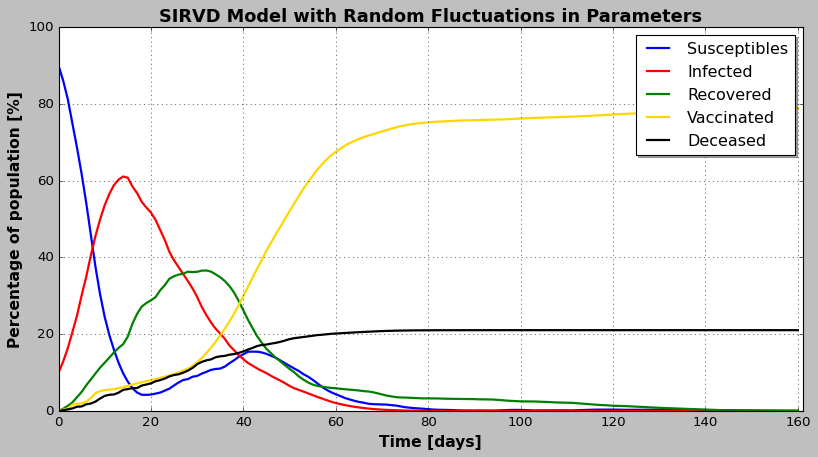

In [607]:
# Plotting the results
S, I, R, V, D = solution.T / N * 100
plt.figure(figsize=(12, 6))
plt.xlim(0, Days + 1)
plt.ylim(0, 100)
plt.plot(S, label="Susceptibles", color= "blue", linewidth= 2)
plt.plot(I, label="Infected", color= "red", linewidth= 2)
plt.plot(R, label="Recovered", color= "green", linewidth= 2)
plt.plot(V, label="Vaccinated", color= "gold", linewidth= 2)
plt.plot(D, label="Deceased", color= "black", linewidth= 2)
plt.xlabel("Time [days]", fontsize= 14, fontweight= "bold")
plt.ylabel("Percentage of population [%]", fontsize= 14, fontweight= "bold")
plt.legend(shadow= True, loc= "upper right")
plt.title("SIRVD Model with Random Fluctuations in Parameters", fontsize= 16, fontweight= "bold")
plt.grid()

In [608]:
# Everytime N is conserved
S + I + R + V + D

array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 10